<a href="https://colab.research.google.com/github/meyush0/Transport-Demand-Prediction/blob/main/Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Transport Demand prediction



##### **Project Type**    - Regression.
##### **Contribution**    -  Ayush Singh( Individual )

# **Project Summary -**

Nairobi-Transport-Demand-Prediction dataset provided to us is in unformatted manner, uneven data, and duplicate data and also some data columns in it is irrelevant. For doing the analysis on the data, the data needs to be in correct format and well organized formed.

As I read the data present in the file and gone through the details in each and every column. The data set was huge in which some of the data was not required for the analysis so the data was cleaned by dropping some unwanted columns and obtained the target variable "number of ticket", this is got from ride id. then created a new data frame, with the columns we required for the analysis including target variable.

I used feature engineering to get useful columns out of irrelevent column.
Each and every column were compared to gain the insights about the data by doing the exploratory data analysis using python. and also saw the distribution of target variable. Cleaning the dataset, statistically analysing the data and visualizing the data by plotting the data into different graph and charts so that the trend and relationship between the various indicators can be understand easily, Modelling and Predicting the model using Machine learning algorithms.

To preform linear regression, we have to fulfil the assumption of it. so I used Variance inflation factor(VIF) and heatmap to compute multicollinearity in the dataset, I remove the features which have high multicollinearity and acquire the best features for regression. Perform train test split, feature scaling by zscore. I used different types of regression algorithm to train our model like, Linear Regression, Regularized linear regression (Ridge and Lasso), and used all the feature without checking multicollinearity to train our model like, Decision tree regressor, Random Forest regressor, and XGboost regresssor and Also I tuned the parameters of  Regularized linear regression (Ridge and Lasso), Random Forest regressor and XGboost regressor and also found the important features for training the model.

Out of them XGboost with tuned hyperparameters gave the best result.

This resulting model can be used by Mobiticket and bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently, to offer promotions and sell other services more effectively, such as microinsurance, or even improve customer service by being able to send alerts and other useful information to customers.

# **GitHub Link -**

https://github.com/meyush0/Transport-Demand-Prediction

# **Problem Statement**


#### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e for a specific route on a specific date and time. There are 17 routes in this dataset. All of the routes end in Nairobi and originate in town to the North-West of the Nairobi towards Lake Victoria.

#### The towns from Which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
*Sirare

#### the routes from these 17 origins to the first stop in the outskirts od Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in central Business District, takes another 2 to 3 hours depending on traffic.

#### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi.
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark
#### The three stops that all these routes make in Nairobi (in order) are :-

1. Kawangware: the first stop in the outskirts of Nairobi

2. Westlands

3. Afya Centre: the main bus terminal where most passengers disembark


#### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people's movement patterns, reflecting business hours, cultural events, political events, and holidays.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data=pd.read_csv("/content/drive/MyDrive/ML - Capstone (Regression)/train_revised.csv")
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset First View

In [ ]:
# Dataset First eight values
data.head(8)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
7,5778,25,Mpesa,MYVTYFNXDZ,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
# dataset last eifgt values
data.tail(8)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51637,13812,5A,Mpesa,DE3JCD4BEW,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49
51638,13812,9A,Mpesa,SBOGQXXRJY,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49
51639,13825,24A,Mpesa,B3R9XWCV9O,20-04-18,7:09,Rongo,Nairobi,Bus,49
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Dataset Rows: {}'.format(data.shape[0]))
print('Dataset Columns: {}'.format(data.shape[1]))

Dataset Rows: 51645
Dataset Columns: 10


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [ ]:
#there is no null values in this dataset

### What did you know about your dataset?

###### Nairobi Transport Data.csv (zipped) is the dataset of tickets *purchased from Mobiticket for the 17 routes from 'up country " into Nairobi between 17 october 2017 and 20 April 2018. This dataset includes the variables: ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time.travel_from,travel_to,car_type,max_capacity

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(data.keys())

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')


In [ ]:
# Dataset Describe
data.describe(include='all')

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
count,51645.000000,51645,51645,51645,51645,51645,51645,51645,51645,51645.000000
unique,NaN,61,2,51645,149,78,17,1,2,NaN
top,NaN,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus,NaN
freq,NaN,2065,51532,1,856,3926,22607,51645,31985,NaN
mean,10188.645793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534321
std,2211.295708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.451193
min,1442.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
25%,8287.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
50%,10353.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000
75%,12029.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000


In [ ]:
#finding the relation between car_type and max_capacity
data.groupby(['car_type','max_capacity'])['max_capacity'].count().unstack()

max_capacity,11,49
car_type,,
Bus,NaN,31985.0
shuttle,19660.0,NaN


Bus has 49 seat capacity and shuttle had 11 seat

In [ ]:
#finding the relation between 'car_type' and 'travel_from'
data.groupby(['travel_from','car_type'])['car_type'].count().unstack()

car_type,Bus,shuttle
travel_from,,
Awendo,1788.0,NaN
Homa Bay,6304.0,NaN
Kehancha,1909.0,NaN
Kendu Bay,1.0,NaN
Keroka,341.0,647.0
Keumbu,3.0,19.0
Kijauri,408.0,623.0
Kisii,4236.0,18371.0
Mbita,378.0,NaN


Shuttle only used for travel from Keroka, Keumbu, Kijauri and kisii town where bus used for travel from all the town

### Variables Description

`ride_id` : unique ID of the vehicle on a specific route on a specific day and time

`seat_number`: seat assigned to ticket.

`payment_method` :  Method used by customer to purchase ticket from Mobiticket.

`payment_receipt` : unique id number for ticket purchased from Mobiticket.

`travel_date` : date of ride departure. (DD/MM/YYYY)

`travel_time` : Scheduled departure time of ride. (hh:mm)

`travel_from` : town from which ride originated.

`travel_to` : destination od ride.All rides are to Nairobi.

`car_type` : vehicle type. (shuttle or bus)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

***for ride_id:***

In [ ]:
unique_ride_id = data['ride_id'].unique()
print(f"ride_id: {len(unique_ride_id)} unique values")
print(unique_ride_id)
print("\n")

ride_id: 6249 unique values
[ 1442  5437  5710 ... 13825 13826 14304]




***for seat_number:***

In [ ]:
unique_seat_number = data['seat_number'].unique()
print(f"seat_number: {len(unique_seat_number)} unique values")
print(unique_seat_number)
print("\n")

seat_number: 61 unique values
['15A' '14A' '8B' '19A' '11A' '18B' '25' '21B' '22A' '17B' '1X' '3A' '1B'
 '1' '4A' '18A' '23A' '5' '16B' '8' '15B' '10' '3' '9' '7' '6' '4' '2'
 '20A' '9A' '22B' '23B' '24A' '2B' '13B' '24B' '14B' '20B' '19B' '10A'
 '17A' '2A' '7B' '6B' '5B' '3B' '4B' '1A' '5A' '6A' '21A' '13A' '8A' '9B'
 '12B' '10B' '7A' '16A' '12A' '11B' '14']




***for payment_method:***

In [ ]:
unique_payment_method = data['payment_method'].unique()
print(f"payment_method: {len(unique_payment_method)} unique values")
print(unique_payment_method)
print("\n")

payment_method: 2 unique values
['Mpesa' 'Cash']




***for payment_receipt:***

In [ ]:
unique_payment_receipt = data['payment_receipt'].unique()
print(f"payment_receipt: {len(unique_payment_receipt)} unique values")
print(unique_payment_receipt)
print("\n")

payment_receipt: 51645 unique values
['UZUEHCBUSO' 'TIHLBUSGTE' 'EQX8Q5G19O' ... 'LVN64LZDNN' 'REYBSKTYWN'
 'AQN7FBUSGP']




***for travel_date:***

In [ ]:
unique_travel_date = data['travel_date'].unique()
print(f"travel_date: {len(unique_travel_date)} unique values")
print(unique_travel_date)
print("\n")

travel_date: 149 unique values
['17-10-17' '19-11-17' '26-11-17' '27-11-17' '20-04-18' '19-04-18'
 '18-04-18' '17-04-18' '16-04-18' '15-04-18' '14-04-18' '13-04-18'
 '12-04-18' '11-04-18' '28-11-17' '10-04-18' '09-04-18' '08-04-18'
 '07-04-18' '06-04-18' '05-04-18' '04-04-18' '03-04-18' '02-04-18'
 '01-04-18' '31-03-18' '30-03-18' '29-03-18' '28-03-18' '27-03-18'
 '29-11-17' '26-03-18' '25-03-18' '24-03-18' '23-03-18' '22-03-18'
 '21-03-18' '20-03-18' '19-03-18' '18-03-18' '17-03-18' '16-03-18'
 '30-11-17' '01-12-17' '15-03-18' '02-12-17' '14-03-18' '13-03-18'
 '03-12-17' '04-12-17' '12-03-18' '05-12-17' '11-03-18' '06-12-17'
 '10-03-18' '09-03-18' '07-12-17' '08-03-18' '08-12-17' '07-03-18'
 '06-03-18' '09-12-17' '10-12-17' '05-03-18' '04-03-18' '11-12-17'
 '12-12-17' '03-03-18' '02-03-18' '13-12-17' '01-03-18' '14-12-17'
 '28-02-18' '27-02-18' '15-12-17' '26-02-18' '25-02-18' '24-02-18'
 '23-02-18' '16-12-17' '17-12-17' '22-02-18' '21-02-18' '18-12-17'
 '20-02-18' '19-02-18' '19-12-1

***for travel_time:***

In [ ]:
unique_travel_time = data['travel_time'].unique()
print(f"travel_time: {len(unique_travel_time)} unique values")
print(unique_travel_time)
print("\n")

travel_time: 78 unique values
['7:15' '7:12' '7:05' '7:10' '7:09' '5:10' '9:50' '7:06' '6:00' '5:50'
 '10:58' '6:50' '5:30' '6:40' '9:10' '5:00' '5:20' '10:52' '10:50' '10:51'
 '8:20' '19:03' '7:02' '6:30' '7:20' '7:04' '19:05' '19:04' '6:59' '7:08'
 '5:40' '9:00' '7:14' '7:07' '8:00' '7:30' '10:57' '8:30' '11:01' '7:11'
 '7:03' '6:58' '11:05' '10:20' '10:53' '10:00' '8:50' '10:54' '7:01'
 '7:00' '6:10' '6:20' '10:10' '11:02' '9:40' '9:30' '7:50' '10:56' '10:55'
 '10:40' '10:30' '9:20' '8:40' '8:10' '7:40' '7:13' '11:00' '11:04'
 '19:06' '10:59' '11:07' '11:06' '11:03' '19:07' '11:08' '11:09' '23:09'
 '23:10']




***for travel_from:***

In [ ]:
unique_travel_from = data['travel_from'].unique()
print(f"travel_from: {len(unique_travel_from)} unique values")
print(unique_travel_from)
print("\n")


travel_from: 17 unique values
['Migori' 'Keroka' 'Homa Bay' 'Kisii' 'Keumbu' 'Rongo' 'Kijauri' 'Oyugis'
 'Awendo' 'Sirare' 'Nyachenge' 'Kehancha' 'Kendu Bay' 'Sori' 'Rodi'
 'Mbita' 'Ndhiwa']




***for travel_to:***

In [ ]:
unique_travel_to = data['travel_to'].unique()
print(f"travel_to: {len(unique_travel_to)} unique values")
print(unique_travel_to)
print("\n")

travel_to: 1 unique values
['Nairobi']




***for car_type:***

In [ ]:
unique_car_type = data['car_type'].unique()
print(f"car_type: {len(unique_car_type)} unique values")
print(unique_car_type)
print("\n")

car_type: 2 unique values
['Bus' 'shuttle']




***for max_capacity:***

In [ ]:
unique_max_capacity = data['max_capacity'].unique()
print(f"max_capacity: {len(unique_max_capacity)} unique values")
print(unique_max_capacity)
print("\n")

max_capacity: 2 unique values
[49 11]




* ride_id:   Count: 6249 unique values

* seat_number: Count: 61 unique values

* payment_method: Unique values: ['Mpesa', 'Cash']

* payment_receipt: Count: 51645 unique values

* travel_date:   Count: 149 unique values

* travel_time:  Count: 78 unique values

* travel_from: Unique values: ['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Rodi', 'Ndhiwa', 'Kijauri', 'Kendu Bay', 'Kehancha', 'Mbita', 'Kisumu']

* travel_to: Unique values: ['Nairobi']

* car_type: Unique values: ['Bus', 'shuttle']

* max_capacity: Unique values: ['49', '11']

### ***Finding Our Target Variable***

The target variable, in this case, is the number of seats that Mobiticket can expect to sell for each ride. This is the variable you want your predictive model to estimate or predict. It represents the outcome or response that your model is trying to understand or forecast.

In the context of the challenge, you'll likely have historical data that includes information on the number of seats sold for each ride.

In [ ]:
#apply groupby on ride_id to get number of ticket
label=data.groupby(['ride_id']).seat_number.count().sort_values(ascending=False).rename('number_of_ticket')
label.head()

ride_id
8454     50
13211    49
11382    49
8090     49
10834    49
Name: number_of_ticket, dtype: int64

Now we found our target variable so let us delete the duplicate value

In [ ]:
#drop duplicates
data1=data.drop_duplicates('ride_id')

In [ ]:
data1.shape

(6249, 10)

In [ ]:
#merging of target variable on the basis od ride_id
data2=data1.merge(label,how='left',on='ride_id')
data2.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


Now we have found our final dataset so let us remove features that dosen't seem to be important for predicting the number of ticket in out model

In [ ]:
#remove unwanted columns
data2=data2.drop(['seat_number','payment_receipt'],axis=1)

## ***Removing Constant Features***

We need to first remove the constant features (i.e Nairobi)

In [ ]:
data2 = data2.drop("travel_to", axis=1)

##  ***3. feature Enginering***

In [ ]:
#This will result in a Series of strings representing the dates.
travel_date=pd.to_datetime(data2['travel_date'],dayfirst=True).astype('str')

In [ ]:
# single column representing the combined datetime for further analysis or modeling.
data2['date']=travel_date  + " "+data2['travel_time']

In [ ]:
data2.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 7:15
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 7:12
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 7:05
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 7:10
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 7:12


In [ ]:
def time_features (df):
    """This function takes dataframe as an argument and extracts the different features
    from the date variable of the dataset and finaly
    returns ti dataset I"""

    df["date"]=pd.to_datetime(df["date"])
    #Converts the 'date' column to datetime format.

    df["day of week"]=df["date"].dt.dayofweek
    # Extracts the day of the week.

    df["day of year"]=df["date"].dt.dayofyear
    #Extracts the day of the year.

    df["day of month"]=df["date"].dt.day
    #Extracts the day of the month.

    df["hour"]=df["date"].dt.hour
    #Extracts the hour.

    df["minute"]=df["date"].dt.minute
    # Extracts the minute.

    df["is weekend"] = df["day of week"].apply(lambda x: 1 if x in [5, 6] else 0)
    # Creates a binary feature indicating whether it's the weekend (Saturday or Sunday).

    df["year"]=df["date"].dt.year
    # Extracts the year.

    df["quarter"]=df["date"].dt.quarter
    #Extracts the quarter.

    df["month"]=df["date"].dt.month
    #Extracts the month.
    return df

incorporating time-related features can help the model understand and leverage temporal patterns in the data. It allows the model to learn how different times of the day, week, month, or year might impact the number of seats sold for each ride.

In [ ]:
#calling the function
final_data=time_features(data2)

In [ ]:
#nrw dataframe with addition of time features
final_data.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day of week,day of year,day of month,hour,minute,is weekend,year,quarter,month
0,1442,Mpesa,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,Mpesa,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,Mpesa,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,Mpesa,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,Mpesa,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


In [ ]:
#for perticular car type
dataset_bus=final_data[final_data['car_type']=='bus']
dataset_shuttle=final_data[final_data['car_type']=='shuttle']

In [ ]:
dataset=(dataset_bus,dataset_shuttle)

In [ ]:
#car_type value
final_data["car_type"].unique()

array(['Bus', 'shuttle'], dtype=object)

### What all manipulations have you done and insights you found?

1. Identified 17 routes originating from towns to the North-West    of Nairobi towards Lake Victoria.
2. Noted that the travel duration from origins to the first stop    in the outskirts of Nairobi takes 8 to 9 hours.
3. Identified the three stops in Nairobi for all routes:            Kawangware, Westlands, and Afya Centre.
4. Created a target variable, 'number_of_ticket,' representing      the count of seats for each ride.
5. Extracted various time-related features from the 'date'          column using the `time_features` function.

## ***4. Univariate Analysis***

#### Chart - 1

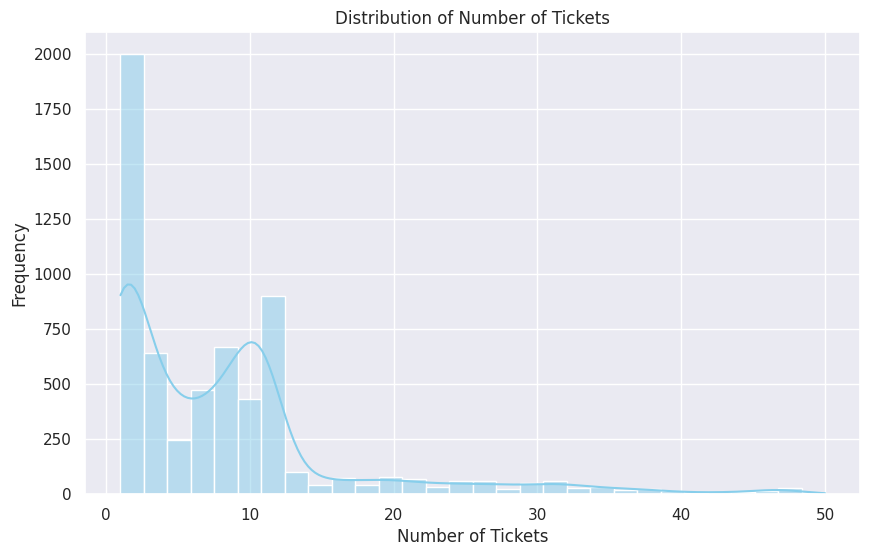

In [ ]:

sns.set(style="darkgrid")

# Plot the distribution of 'number_of_ticket'
plt.figure(figsize=(10, 6))
sns.histplot(final_data['number_of_ticket'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is suitable for visualizing the distribution of a continuous variable, such as the count of tickets `number_of_ticket`. The bins provide insights into the frequency distribution and potential patterns in ticket sales.

##### 2. What is/are the insight(s) found from the chart?

The histogram shows that the majority of rides have a relatively low count of tickets sold. This suggests that most rides may not be fully occupied, but there are a few instances with a higher number of tickets sold.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the distribution of ticket sales `('number_of_ticket')` can help in optimizing resource allocation, such as adjusting the number of available seats based on historical demand patterns. This ensures that resources are efficiently utilized.

#### Chart - 2

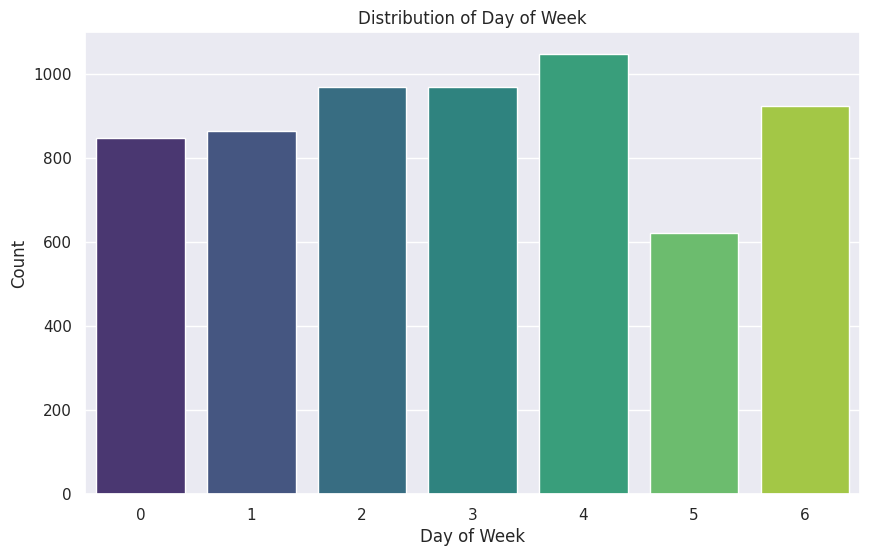

In [ ]:
# Plot the distribution of 'day of week'
plt.figure(figsize=(10, 6))
sns.countplot(x='day of week', data=final_data, palette='viridis')
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is effective for visualizing the distribution of categorical variables. In this case, we're exploring the distribution of rides across different days of the week. The countplot provides a clear count of occurrences for each day.

##### 2. What is/are the insight(s) found from the chart?

The countplot reveals the distribution of rides across different days of the week. It appears that there is variability in the number of rides on different days. Further analysis may be needed to understand the factors contributing to these variations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If certain days with low demand still incur high operational costs, it could result in financial challenges. For example, if the business operates at a loss on specific days due to high fixed costs, it may raise concerns about sustainability.

#### Chart - 3

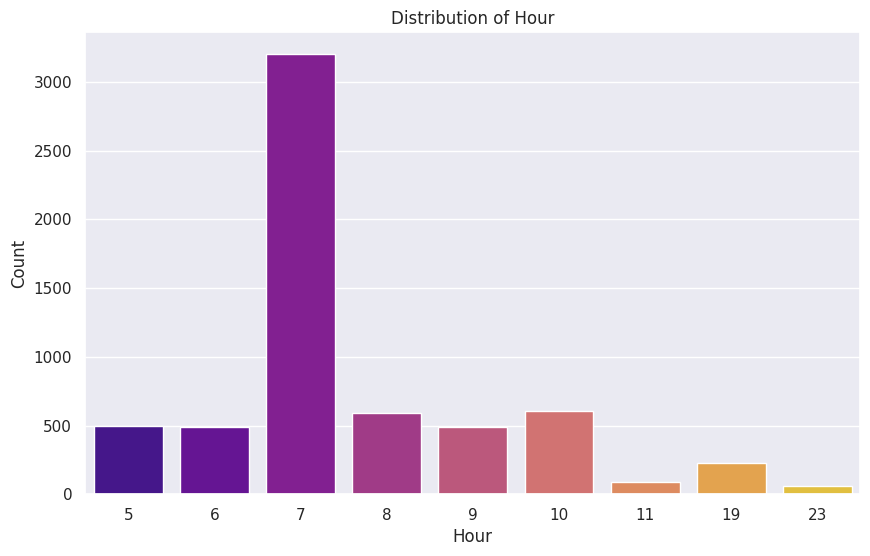

In [ ]:
# Plot the distribution of 'hour'
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=final_data, palette='plasma')
plt.title('Distribution of Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Similar to `'day of week'`, we're interested in the distribution of rides across different hours of the day. A countplot helps visualize the frequency of rides at each hour.

##### 2. What is/are the insight(s) found from the chart?

The countplot for hours shows the distribution of rides across different hours of the day. There might be peaks during certain hours, indicating times of higher demand for rides. This could be associated with peak commuting times or other factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the countplot for 'hour' reveals consistently low demand during peak commuting hours or other historically high-demand periods, it could lead to negative growth. Low utilization during peak times might indicate missed revenue opportunities.

#### Chart - 4

In [ ]:
#relevent column for histogram
plot_col=['number_of_ticket','travel_time','day of month', 'day of week',"month"]
#convert travel time unit into hour.
final_data["travel_time"] = final_data["travel_time"].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60)

In [ ]:
final_data.head()

,ride_id,payment_method,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day of week,day of year,day of month,hour,minute,is weekend,year,quarter,month
0,1442,Mpesa,17-10-17,7.250000,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,7,15,0,2017,4,10
1,5437,Mpesa,19-11-17,7.200000,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,7,12,1,2017,4,11
2,5710,Mpesa,26-11-17,7.083333,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,7,5,1,2017,4,11
3,5777,Mpesa,27-11-17,7.166667,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,7,10,0,2017,4,11
4,5778,Mpesa,27-11-17,7.200000,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,7,12,0,2017,4,11


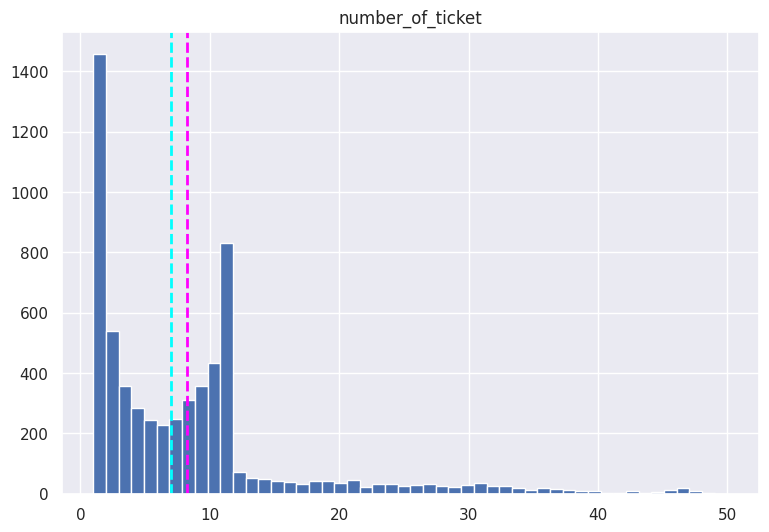

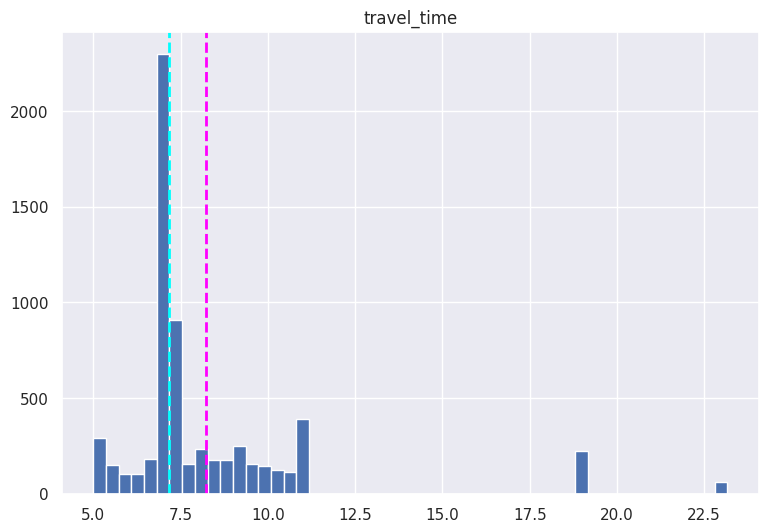

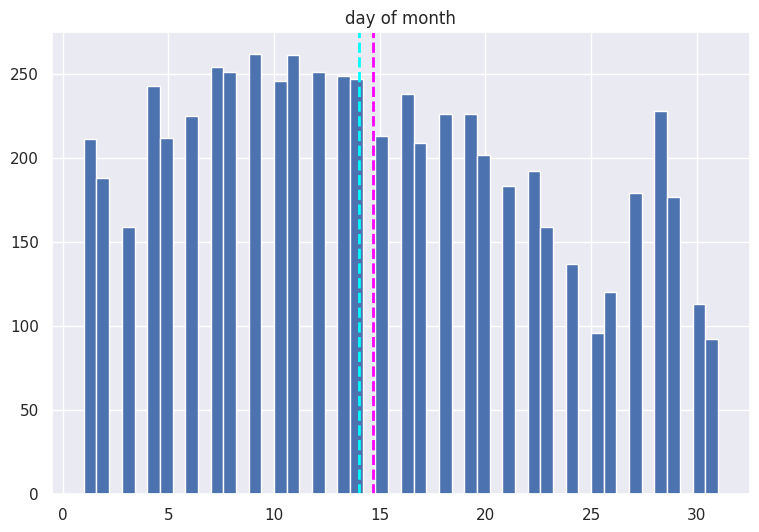

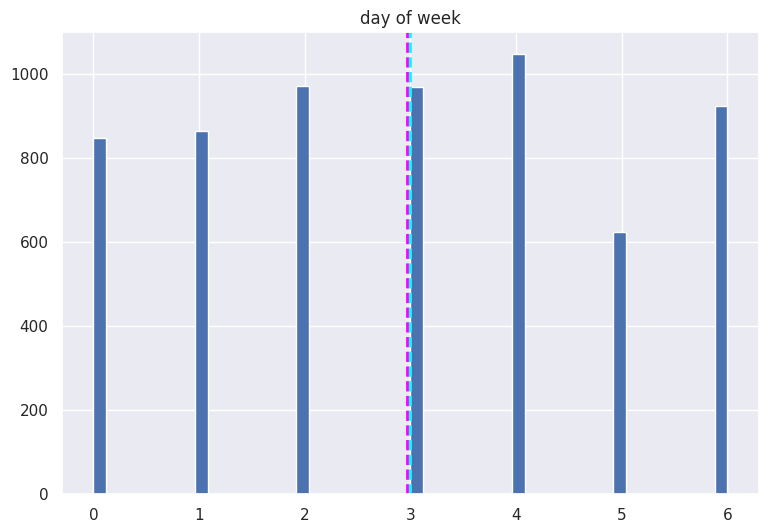

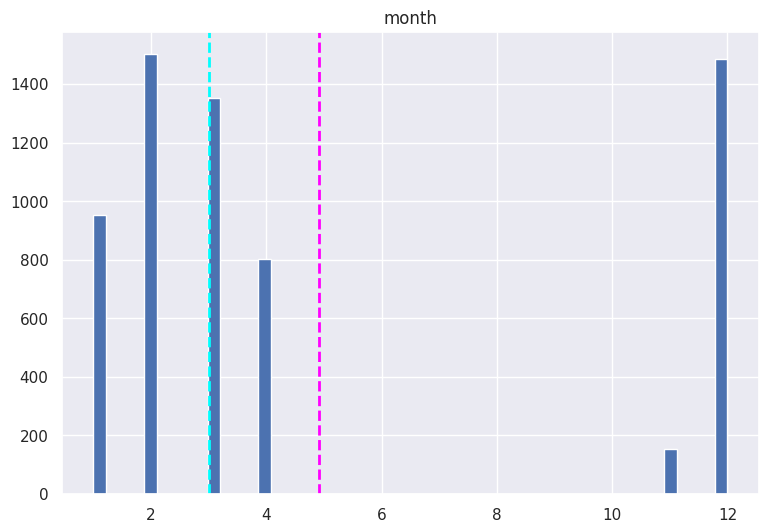

In [ ]:
#histogram
for col in plot_col[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Overlaying vertical lines for mean and median allows for an easy comparison between the two measures of central tendency. This is useful for understanding the shape of the distribution.

##### 2. What is/are the insight(s) found from the chart?

* if mean > median > mode then, distribution of the data is positively skewed,
* if mean = median = mode then, no skewed that is normally distributed,

otherwise, it is negatively skewed.
There is a positive skewed in `number_of_ticket`, `ticket_time` & `month` and `day_of_month` and approximately no skewed in `day_of_week`.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Histograms help in identifying patterns and trends in your data. This could reveal seasonality, trends over time, or patterns in customer behavior. Understanding these patterns allows for better strategic planning.

### chart Box plot

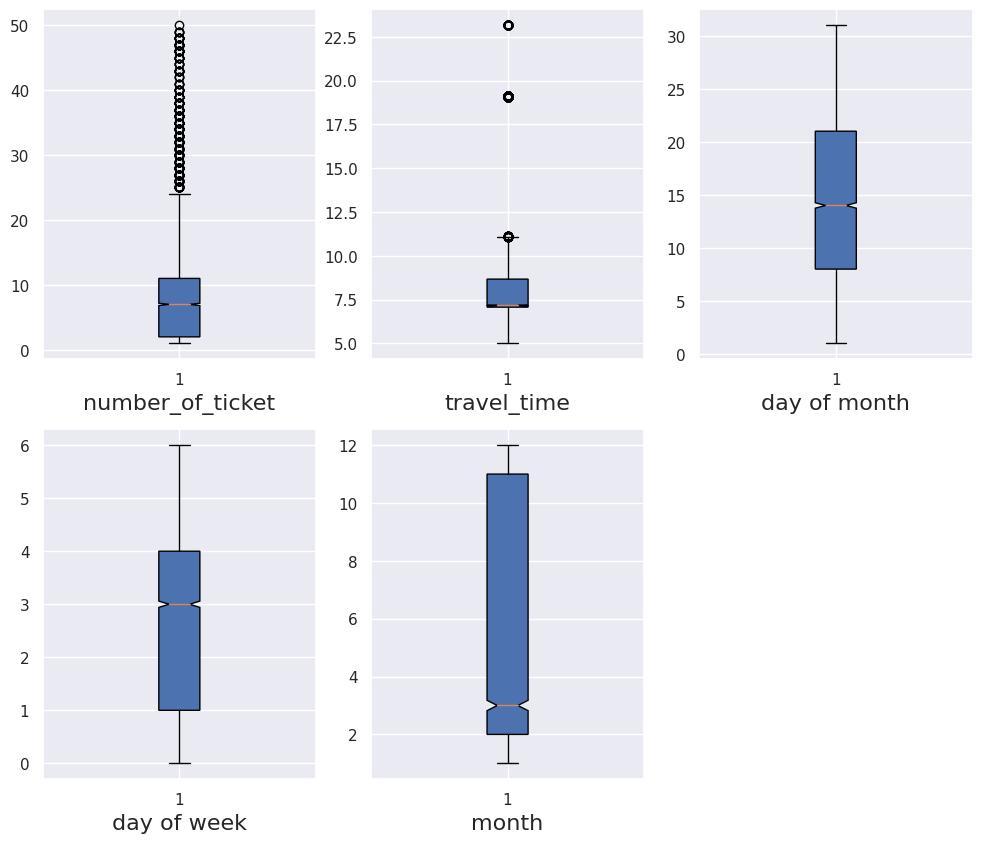

In [ ]:
#boxplot
plt.figure(figsize=(12,10))
for x,y in zip(range(1,len(plot_col)+1),plot_col):
    plt.subplot(2,3,x)
    plt.boxplot(final_data[y],patch_artist=True,notch=True)
    plt.xlabel(y,fontsize=16)
#plt.title("Time series on cyber crime in State/UT",fontsize=25)
plt.show()

##### 1. Why did you pick the specific chart?

This chart(Box-Plot) help us to understand the outliars in the dataset

##### 2. What is/are the insight(s) found from the chart?

from Boxplot, we have got to know about outliers, as we see that, `day_of_month`, `day_of_week`, `month` have no outlier, but `travel_time` and `number_of_ticket` have a lot of outliers.

## ***5. Bivariate Analysis***

###### Travel from different cars

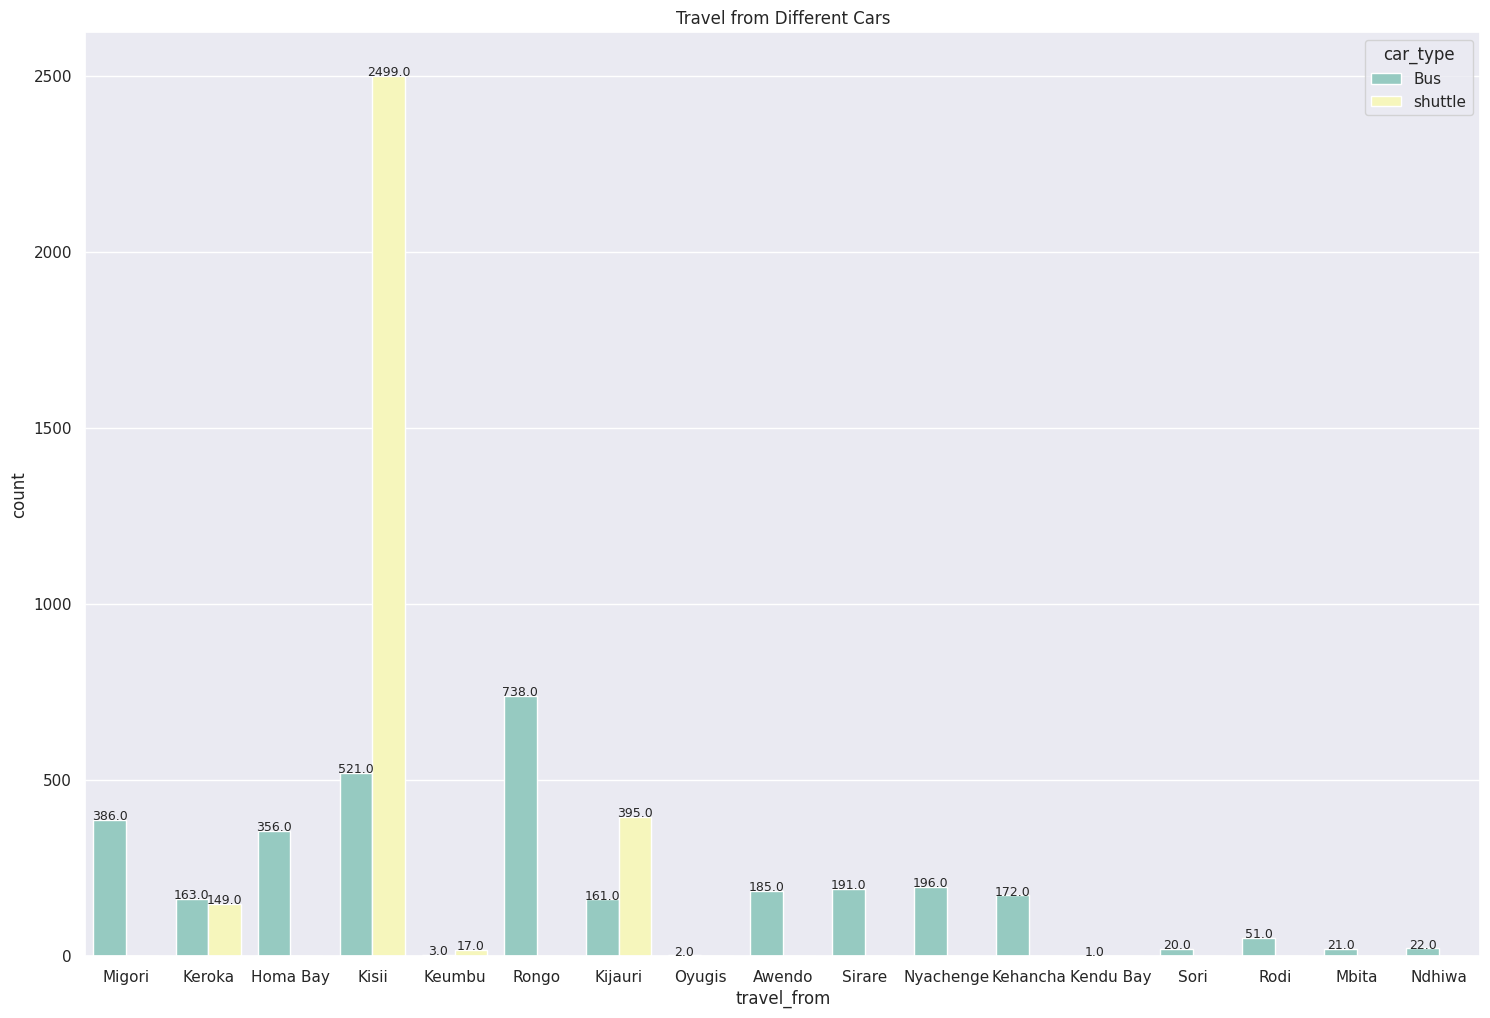

In [ ]:
plt.figure(figsize=(18, 12))

ax = sns.countplot(x=final_data['travel_from'], hue=final_data["car_type"], palette="Set3")

plt.title("Travel from Different Cars")

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", size=9)

plt.show()



##### 1. Why did you pick the specific chart?

The chart compares the counts of different categories `('travel_from')` for each car type. It's effective when you want to visualize and compare the distribution of categorical data across different groups.

##### 2. What is/are the insight(s) found from the chart?

2499 and 521 peoples are travel by bus and shuttle respectively from kisii between 17-10-17 and 20-04-18 which is maximum among all town

#### Chart - Box-plot

In [ ]:
final_data.describe(include=['object']).columns.values

array(['payment_method', 'travel_date', 'travel_from', 'car_type'],
      dtype=object)

In [ ]:
categorical_features=['payment_method','travel_from','car_type']

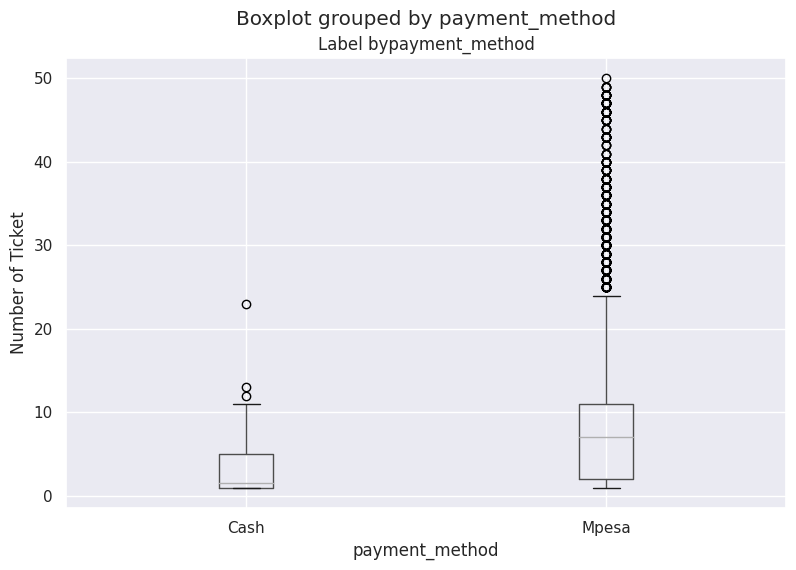

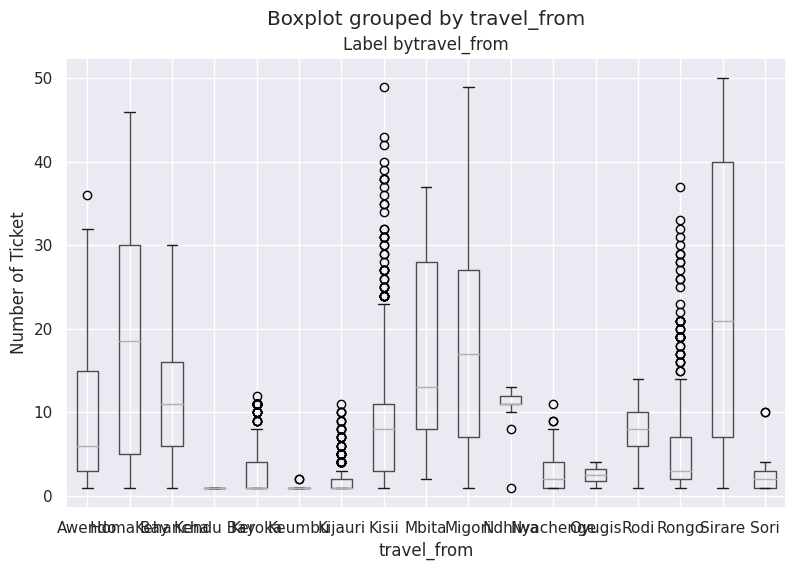

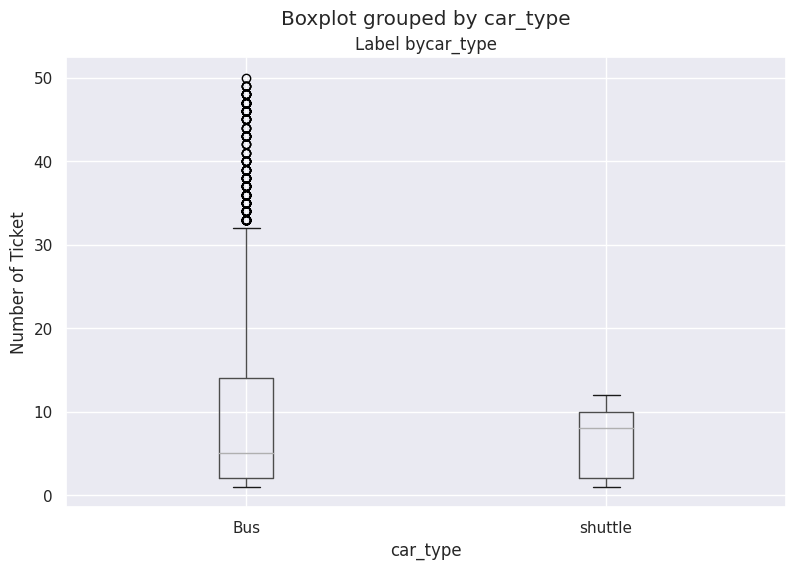

In [ ]:
#plot a boxplot fot the label by each categorical features

for col in categorical_features:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    final_data.boxplot(column='number_of_ticket',by=col,ax=ax)
    ax.set_title('Label by'+col)
    ax.set_ylabel('Number of Ticket')
plt.show()

##### 1. Why did you pick the specific chart?

The "whiskers" in a boxplot show the spread of the data, giving you an idea of how much variation exists within each category.

### Check Multicollinearity**

The goal is to ensure that the features used in your model are not highly correlated, as this can lead to unstable coefficient estimates and challenges in interpretation. By iteratively checking and adjusting for multicollinearity, you aim to improve the robustness of your regression model.

<Axes: >

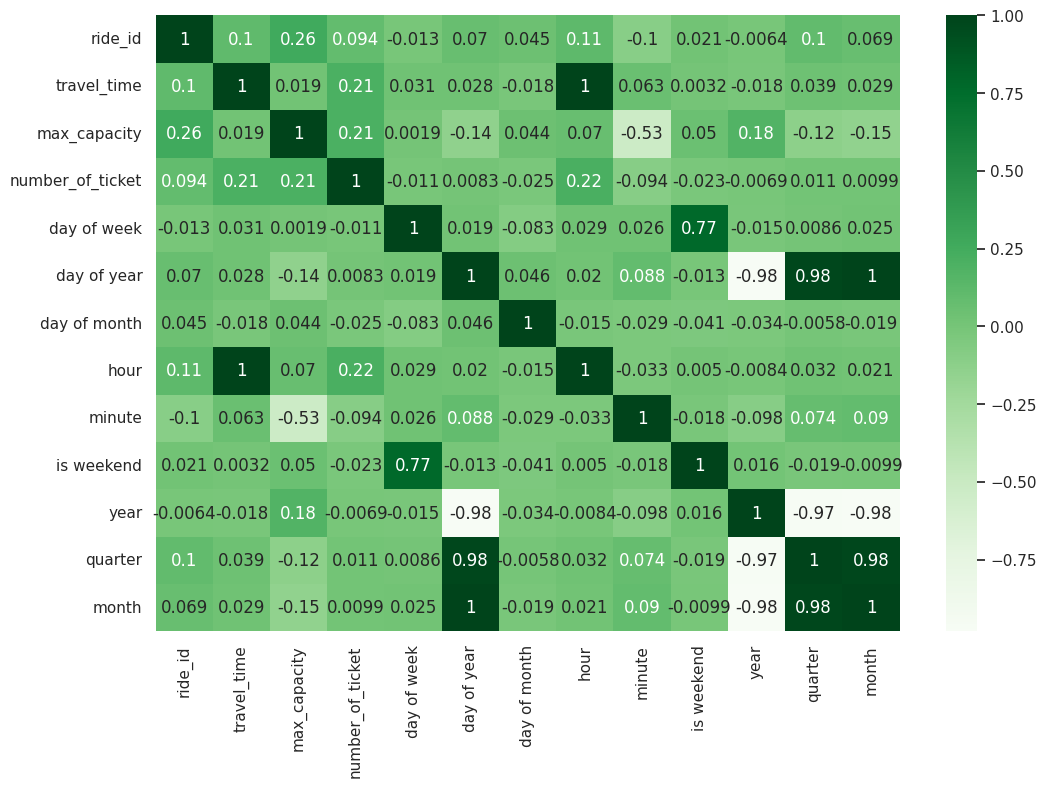

In [ ]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(final_data.corr(),annot=True,cmap="Greens")

##### 2. What is/are the insight(s) found from the chart?

There is a prefect positive correlation between

1. day_of_year & month,

2. hour and travel_time.

There is a high positive correlation between

1. day_of_year and quarter,

2. quarter and month.

There is a high negative correlation between

1. quarter and year,

2. month and year,

3. year and day_of_year.

In [ ]:
#all numerical feature except target variable
col=set(final_data.describe().columns.values)-{'number_of_ticket'}
col

{'day of month',
 'day of week',
 'day of year',
 'hour',
 'is weekend',
 'max_capacity',
 'minute',
 'month',
 'quarter',
 'ride_id',
 'travel_time',
 'year'}

In [ ]:
#Multicollinearity by VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(x):

    #vif
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [ ]:
calculate_vif(final_data[[i for i in col]])

,variables,VIF
0,year,1.600627e+03
1,day of week,8.281078e+00
2,is weekend,3.300631e+00
3,hour,inf
4,day of month,4.886975e+02
5,month,6.345245e+04
6,quarter,1.244186e+02
7,travel_time,inf
8,max_capacity,5.425445e+00
9,day of year,5.774586e+04


In [ ]:
# Exclude specific variables from col
selected_columns = [i for i in col if i not in ["travel_time", "day of year", "quarter", "year","ride_id","max_capacity"]]

# Calculate VIF
vif_result_subset =calculate_vif(final_data[selected_columns])

# Display the VIF DataFrame for the subset
print(vif_result_subset)

      variables       VIF
0   day of week  6.959691
1    is weekend  3.155182
2          hour  4.825434
3  day of month  3.154823
4         month  2.231263
5        minute  1.960549


The second set of VIF results showed that the remaining features have more reasonable levels of correlation with each other.

In [ ]:
#required independent features
req_features=calculate_vif(final_data[[i for i in col if i not in ['travel_time',"day of year","quarter","year",'ride_id','max_capacity']]]).variables.values
req_features

array(['day of week', 'is weekend', 'hour', 'day of month', 'month',
       'minute'], dtype=object)

 `(req_features)` with acceptable VIF values for further analysis.

#### Chart -  countplot

In [ ]:
last_date=final_data["date"].max()
first_date=final_data["date"].min()
print(f"dataset have data between {first_date} and {last_date}")

dataset have data between 2017-10-17 07:15:00 and 2018-04-20 23:10:00


In [ ]:
#function for plotting countplot with values on their top.
def countplot_values(feature):
    y = final_data[feature].value_counts().reset_index()[feature]

    # Bar plot
    plt.figure(figsize=(10, 10))
    final_data[feature].value_counts().plot(kind='barh', color="orange")

    # Adding count values on the bars
    for index, value in enumerate(y):
        plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

    # Display the plot
    plt.show()

    return feature

### Payment Method

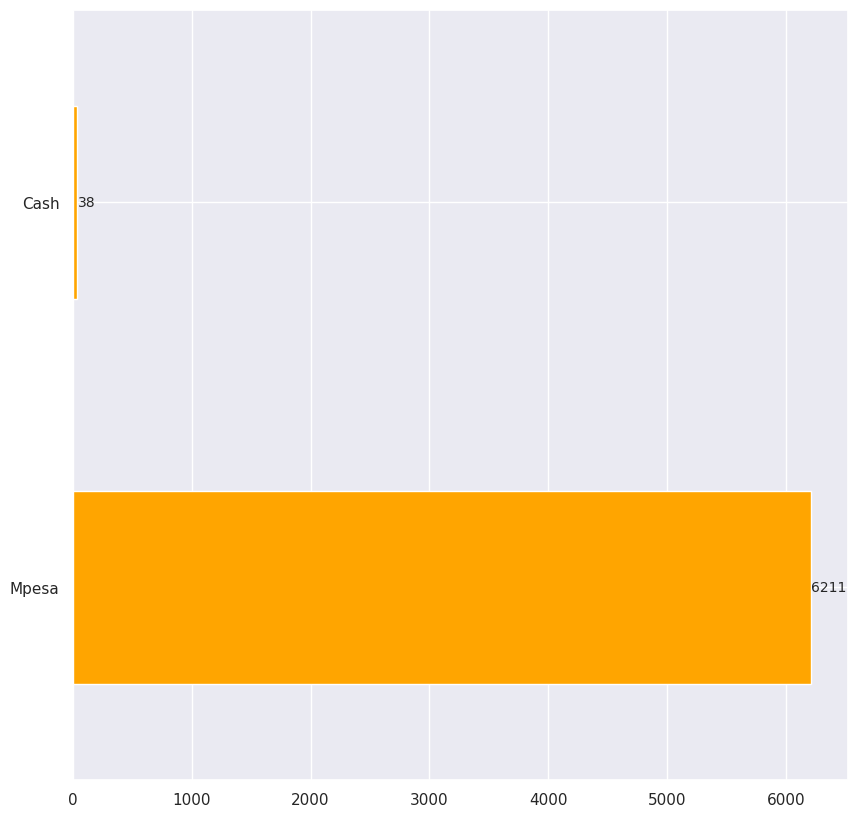

'payment_method'

In [ ]:
countplot_values("payment_method")

Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

### car type

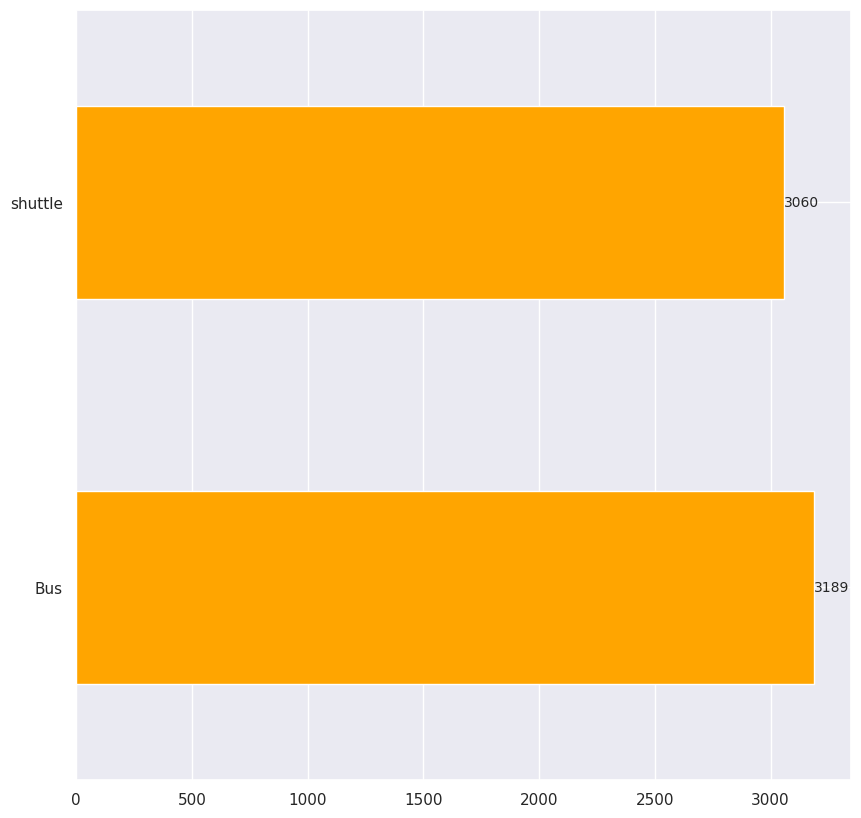

'car_type'

In [ ]:
countplot_values('car_type')

Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

###  Travel time

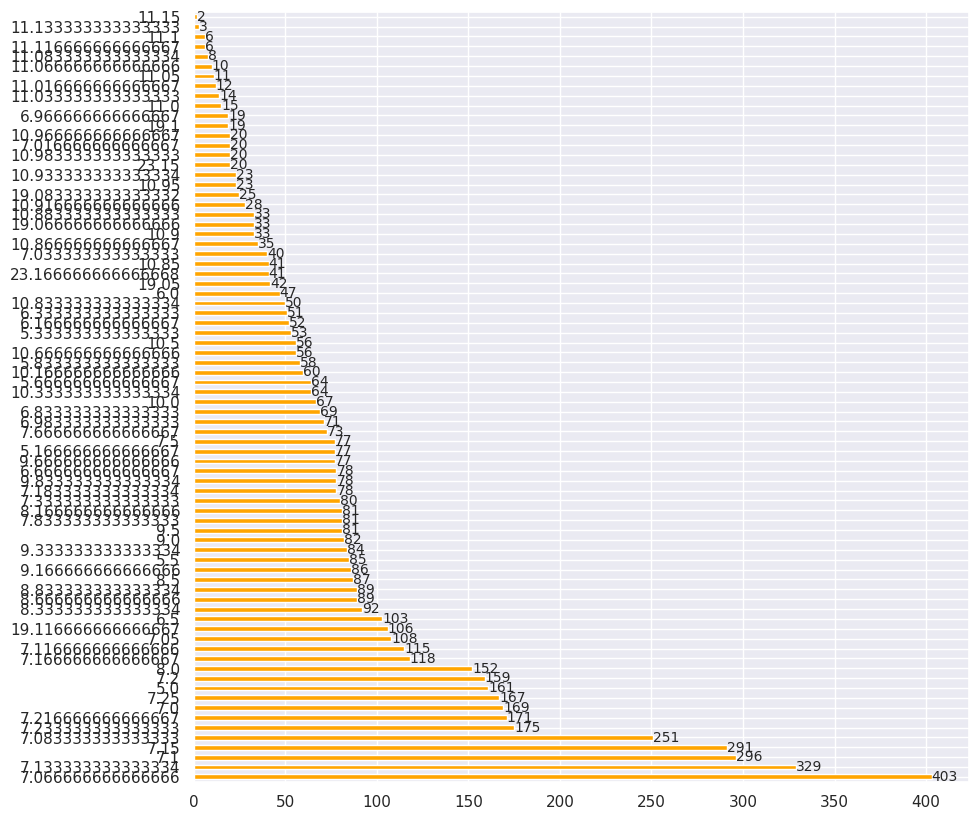

'travel_time'

In [ ]:
countplot_values('travel_time')

Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M. because most vehicle are began at 7:04 A.M., 7:08 A.M. and 7:06 A.M. for travel to Nairobi.

### Travel from

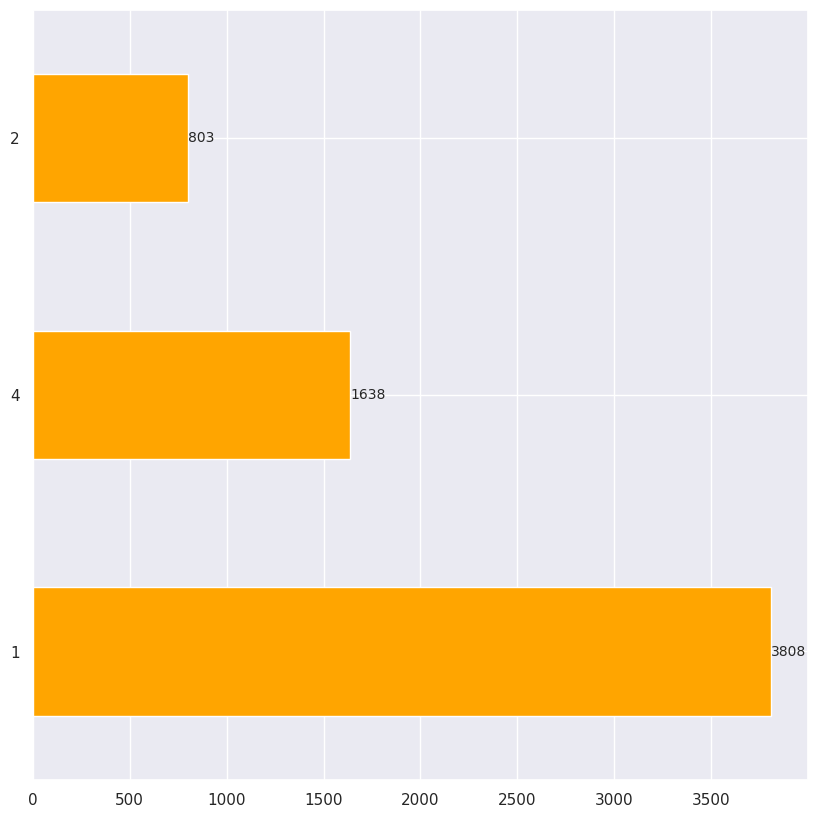

'quarter'

In [ ]:
countplot_values('quarter')

Mostly vehicle are originated from Kisii, Rongo and Kijauri.

### Quarter

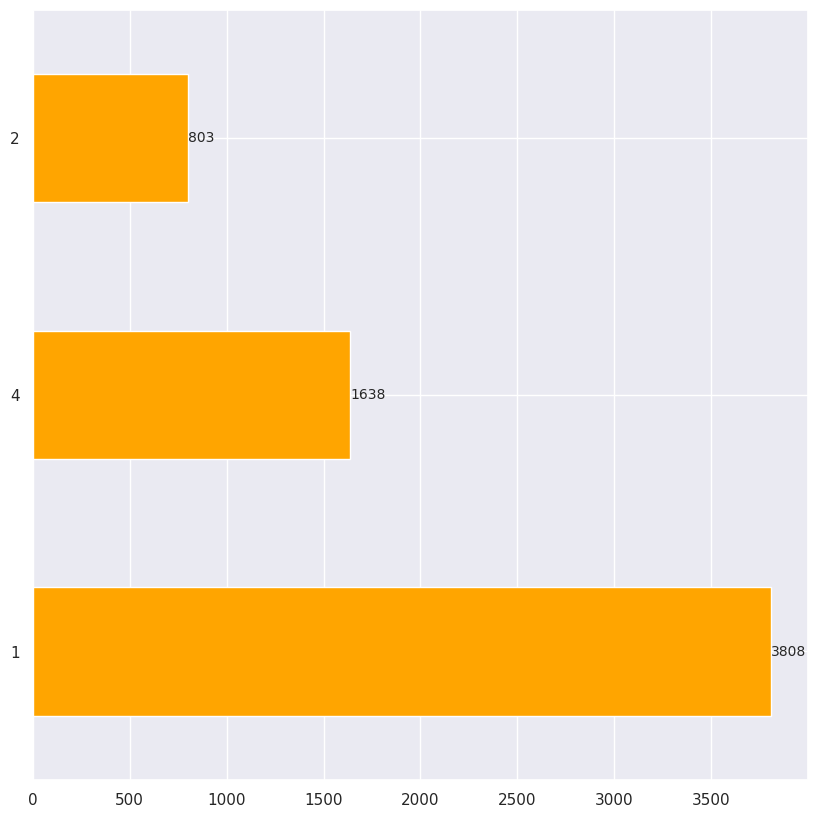

'quarter'

In [ ]:
countplot_values('quarter')

we conclude that maximum vehicles are used in quarter 1.

### year

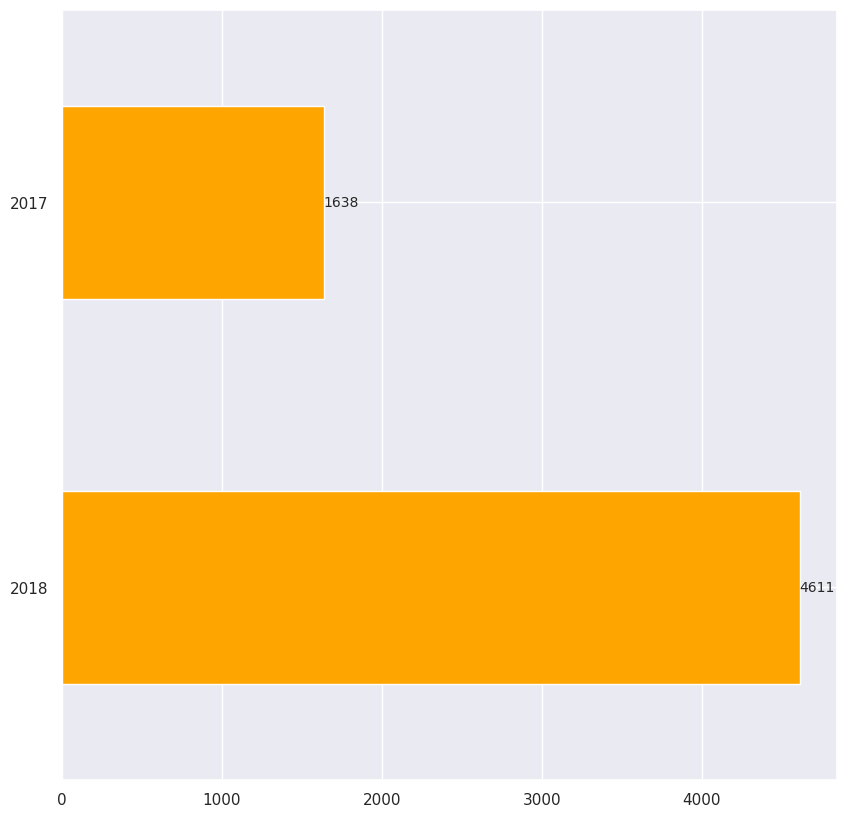

'year'

In [ ]:
countplot_values('year')

This dataset contains data of 2 year.(i.e. 2017 and 2018)

### Month

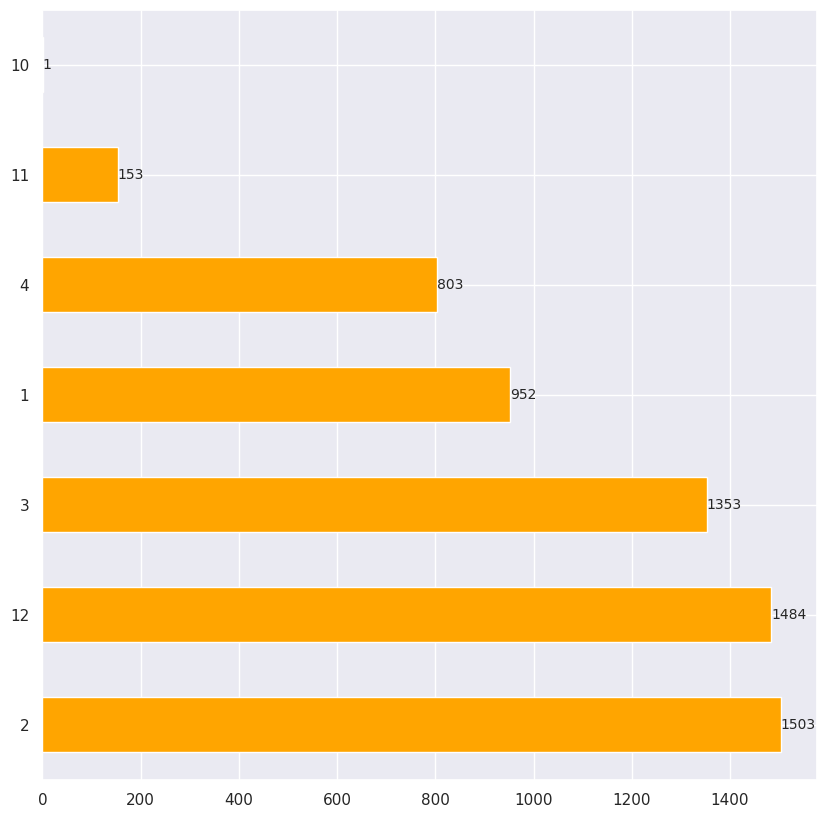

'month'

In [ ]:
countplot_values('month')

we conclude that maximum vehicles are used in month 2, 12 and 3.

##### 1. Why did you pick the specific chart?

Countplot is a suitable choice when dealing with categorical data, providing a clear visual representation of the frequency distribution of each category. It's effective for analyzing the distribution of discrete variables, such as the number of tickets or counts in different categories.

##### 2. What is/are the insight(s) found from the chart?

* By Bus, Number of ticket 1 is most frequent with value 699.

* By shuttle, Number of ticket 1 and 11 are most frequent with values 759 and 748 respectively.

* Mpesa is used mostly in Payment mode type, i.e., cash is less prefered by the people who travel to Nairobi.

* Mostly people travel by a bus (i.e. with maximum capacity 49) as compare to shuttle (whose maximum capacity is 11).

* Mostly vehicle are originated from Kisii, Rongo and Kijauri.

* Most prefer time for travel to Nairobi is 7:04 A.M., 7:08 A.M. and 7:06 A.M..

* This dataset contains data of 2 year (i.e. 2017 and 2018).

* we conclude that maximum vehicles are used in quarter 1.

* we conclude that maximum vehicles are used in month 2, 12 and 3

#### Chart  - Pair Plot

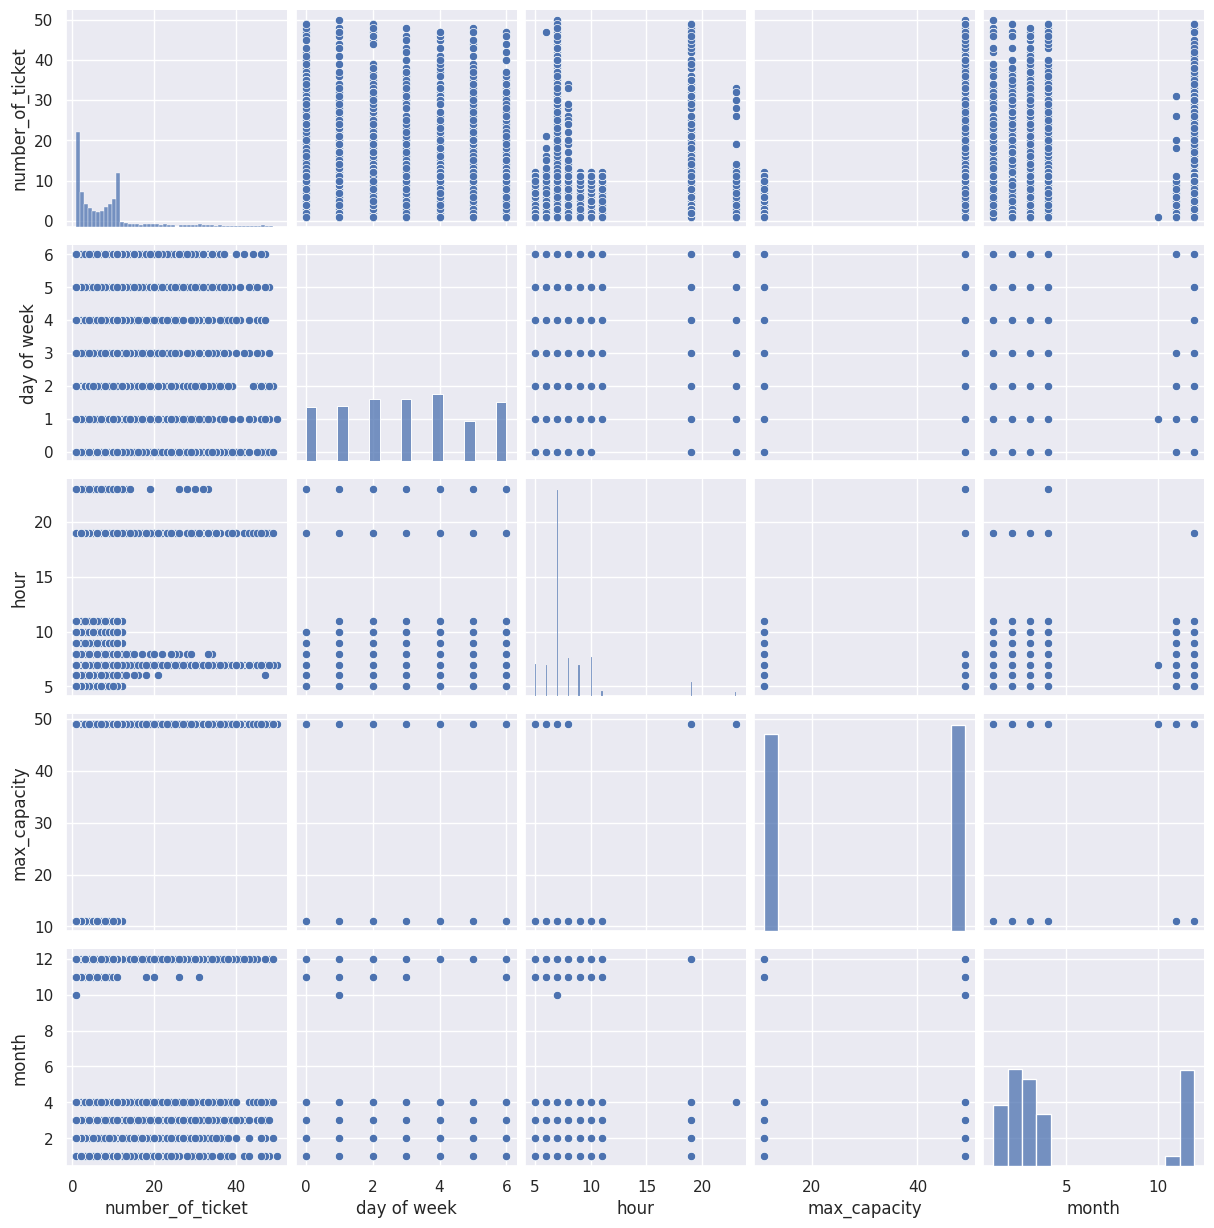

In [ ]:
# Select relevant features
pairplot_features = ['number_of_ticket', 'day of week', 'hour', 'max_capacity', 'month']

# Subset the data
pairplot_data = final_data[pairplot_features]

# Create a pair plot
sns.pairplot(pairplot_data)
plt.show()

##### 1. Why did you pick the specific chart?

It allows us to visualize the relationships between pairs of variables. Each subplot in the grid represents the scatterplot between two variables.

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Statement 1: The choice of payment method is independent of the vehicle type.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

`Null Hypothesis (H0)`: Payment method and vehicle type are independent.

`Alternative Hypothesis (H1)`: Payment method and vehicle type are dependent.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['payment_method'],data['car_type'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Make a decision
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. Payment method and vehicle type are dependent.")
else:
    print("Fail to reject the null hypothesis. Payment method and vehicle type are independent.")

Chi-square statistic: 24.42993996839518
P-value: 7.706172964476798e-07
Reject the null hypothesis. Payment method and vehicle type are dependent.


##### Which statistical test have you done to obtain P-Value?

I've done Chi-Square test to obtain the p-value and the `P-value=7.706172964476798e-07`

##### Why did you choose the specific statistical test?

Chi-square tests are commonly used to assess the independence between two categorical variables. The obtained p-value helps you make decisions about the null hypothesis—whether to reject it or not.

### Statement 2: The distribution of travel times is the same for buses and shuttles.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

`Null Hypothesis (H0)`: The distribution of travel times is the same for buses and shuttles.

`Alternative Hypothesis (H1)`: The distribution of travel times is different for buses and shuttles.

#### 2. Perform an appropriate statistical test.

In [ ]:
#performed test for p-value
from scipy.stats import ks_2samp

# Assuming df is your DataFrame with columns 'travel_time' and 'car_type'
bus_travel_times = data[data['car_type'] == 'Bus']['travel_time']
shuttle_travel_times = data[data['car_type'] == 'shuttle']['travel_time']

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(bus_travel_times, shuttle_travel_times)

# Print the results
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Decide whether to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of travel times is different for buses and shuttles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the distribution of travel times.")

KS Statistic: 0.4873529937020644
P-value: 0.0
Reject the null hypothesis. The distribution of travel times is different for buses and shuttles.


##### Which statistical test have you done to obtain P-Value?

The Kolmogorov-Smirnov test is a non-parametric test that checks if two samples are drawn from the same distribution.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

`Null Hypothesis (H0)`: There is no significant difference in the number of tickets purchased between weekdays and weekends.

`Alternative Hypothesis (H1)`: There is a significant difference in the number of tickets purchased between weekdays and weekends.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Separate the data for weekdays and weekends
weekday_data = final_data[final_data['is weekend'] == 0]['number_of_ticket']
weekend_data = final_data[final_data['is weekend'] == 1]['number_of_ticket']

# Perform t-test
statistic, p_value = ttest_ind(weekday_data, weekend_data, equal_var=False)

# Print the results
print("T-statistic:", statistic)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


T-statistic: 1.8095110081134465
Fail to reject the null hypothesis. There is no significant difference.


In [ ]:
# t-test is a statistical test used to compare the means of two groups and assess whether there is a significant difference between them.

##### Which statistical test have you done to obtain P-Value?

I used t-test to obtain the p-value which is `0.07045550409414393`

##### Why did you choose the specific statistical test?

because the column `is weeknd` is normally distributed

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
final_data.isnull().sum()

ride_id             0
payment_method      0
travel_date         0
travel_time         0
travel_from         0
car_type            0
max_capacity        0
number_of_ticket    0
date                0
day of week         0
day of year         0
day of month        0
hour                0
minute              0
is weekend          0
year                0
quarter             0
month               0
dtype: int64

### 2. Categorical Encoding

In [ ]:
# Encode your categorical columns
dj= pd.get_dummies(final_data, columns=['travel_from'])
label_enc = {'Bus':1,'shuttle':0 ,"Mpesa":1,"Cash":0}
dj.replace(label_enc,inplace=True)

In [ ]:
dj.head()

,ride_id,payment_method,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day of week,day of year,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1442,1,17-10-17,7.250000,1,49,1,2017-10-17 07:15:00,1,290,...,0,0,1,0,0,0,0,0,0,0
1,5437,1,19-11-17,7.200000,1,49,1,2017-11-19 07:12:00,6,323,...,0,0,1,0,0,0,0,0,0,0
2,5710,1,26-11-17,7.083333,1,49,1,2017-11-26 07:05:00,6,330,...,0,0,0,0,0,0,0,0,0,0
3,5777,1,27-11-17,7.166667,1,49,5,2017-11-27 07:10:00,0,331,...,0,0,0,0,0,0,0,0,0,0
4,5778,1,27-11-17,7.200000,1,49,31,2017-11-27 07:12:00,0,331,...,0,0,1,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding for Binary Features:

Features: `'car_type'`, `'payment_method'`
* Reason: These features have only two unique values, so label encoding is suitable to convert them into numerical form (0 or 1).

One-Hot Encoding for Nominal Categorical Features:

Features: `'travel_from'`
* Reason: 'travel_from' has more than two categories, and one-hot encoding helps create binary columns for each category, avoiding ordinal assumptions.

### 3. Data Transformation

In [ ]:
dj.shape

(6249, 34)

In [ ]:
# Transform Your data
unreqd_col=['travel_time',"day of year","quarter","year","ride_id","travel_date","max_capacity","date"]

In [ ]:
#make a new dataframe with dependent and dependent features
df=dj.drop(columns=unreqd_col)

In [ ]:
df.head()

,payment_method,car_type,number_of_ticket,day of week,day of month,hour,minute,is weekend,month,travel_from_Awendo,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,1,1,1,1,17,7,15,0,10,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,6,19,7,12,1,11,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,6,26,7,5,1,11,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,5,0,27,7,10,0,11,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,31,0,27,7,12,0,11,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.shape

(6249, 26)

### 4. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
#independent and dependent features
y=df.iloc[:,2]  # target variable

In [ ]:
X=df.drop(columns=['number_of_ticket'])

In [ ]:
# apply zscore for scaling
from scipy.stats import zscore
X=X.apply(zscore)
X.head()           #Standardizing features helps in comparing the importance of different predictors.

,payment_method,car_type,day of week,day of month,hour,minute,is weekend,month,travel_from_Awendo,travel_from_Homa Bay,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,0.078219,0.979565,-1.007732,0.277866,-0.322023,-0.143556,-0.573593,1.194234,-0.174665,-0.245786,...,-0.967096,-0.058068,3.897322,-0.059439,-0.179946,-0.017893,-0.090711,-0.365943,-0.177563,-0.056664
1,0.078219,0.979565,1.548206,0.516988,-0.322023,-0.319847,1.743396,1.429207,-0.174665,-0.245786,...,-0.967096,-0.058068,3.897322,-0.059439,-0.179946,-0.017893,-0.090711,-0.365943,-0.177563,-0.056664
2,0.078219,0.979565,1.548206,1.353915,-0.322023,-0.731192,1.743396,1.429207,-0.174665,-0.245786,...,-0.967096,-0.058068,-0.256586,-0.059439,-0.179946,-0.017893,-0.090711,-0.365943,-0.177563,-0.056664
3,0.078219,0.979565,-1.518920,1.473476,-0.322023,-0.437374,-0.573593,1.429207,-0.174665,4.068583,...,-0.967096,-0.058068,-0.256586,-0.059439,-0.179946,-0.017893,-0.090711,-0.365943,-0.177563,-0.056664
4,0.078219,0.979565,-1.518920,1.473476,-0.322023,-0.319847,-0.573593,1.429207,-0.174665,-0.245786,...,-0.967096,-0.058068,3.897322,-0.059439,-0.179946,-0.017893,-0.090711,-0.365943,-0.177563,-0.056664


In [ ]:
#train test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(4999, 25)
(1250, 25)
(4999,)
(1250,)


## ***7. ML Model Implementation***

### ML Model - Linear Regression

In [ ]:
#import the libraryes
from sklearn.linear_model import LinearRegression
import math

In [ ]:
# ML Model - 1 Implementation
model1=LinearRegression()
# Fit the Algorithm
model1.fit(X_train1 , y_train1)
# Predict on the model
y_pred=model1.predict(X_test1)

In [ ]:
#model score
train_acc=model1.score(X_train1,y_train1)
print('Training Accuracy :',train_acc)

test_acc=model1.score(X_test1,y_test1)
print('testing Accuracy :',test_acc)

Training Accuracy : 0.36949230870350713
testing Accuracy : 0.4190320060923901


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
MSE=mean_squared_error(y_test1,y_pred)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred))
print('RMSE is:',RMSE)

MSE is: 50.6900910488944
MAE is: 4.824988182233614
r2: 0.4190320060923901
adjust_r2 is: 0.40716582974623794
RMSE is: 7.119697398688683


### ML Model - Lasso Regression

In [ ]:
#importing Lasso
from sklearn.linear_model import Lasso
# ML Model - Lasso Regression Implementation
lasso=Lasso(alpha=0.01, max_iter=4000)
# Fit the Algorithm
lasso.fit(X_train1 , y_train1)

Lasso(alpha=0.01, max_iter=4000)

In [ ]:
# Predict on the model
y_pred_l=lasso.predict(X_test1)

In [ ]:
# Model score on Train and Test
train_model_llr = lasso.score(X_train1,y_train1)
print('Training Accuracy:',train_model_llr)

test_model_llr = lasso.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_llr)

Training Accuracy: 0.36949334593664007
Testing Accuracy: 0.4179369737058781


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test1,y_pred_l)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred_l)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred_l)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred_l))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred_l))
print('RMSE is:',RMSE)

MSE is: 50.78563381881609
MAE is: 4.820538528788759
r2: 0.4179369737058781
adjust_r2 is: 0.4060484315021583
RMSE is: 7.126403989307376


#### 2. Cross- Validation & Hyperparameter Tuning for lasso Regressor

In [ ]:
# ML Model - Lasso Regression Implementation with hyperparameter optimization techniques
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,
                        1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=3)
lasso_regressor.fit(X_train1, y_train1)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.01, max_iter=4000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}


In [ ]:
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test1)

In [ ]:
# Model score on Train and Test
train_model_lrh = lasso_regressor.score(X_train1,y_train1)
print('Training Accuracy:',train_model_lrh)

test_model_lrh = lasso_regressor.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_lrh)

Training Accuracy: 0.36949334593664007
Testing Accuracy: 0.4179369737058781


In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test1,y_pred_lasso)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred_lasso)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred_lasso)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred_lasso))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred_lasso))
print('RMSE is:',RMSE)

MSE is: 50.78563381881609
MAE is: 4.820538528788759
r2: 0.4179369737058781
adjust_r2 is: 0.4060484315021583
RMSE is: 7.126403989307376


##### Which hyperparameter optimization technique have you used and why?

Lasso Regression is a type of linear regression that includes an L1 regularization term. The regularization strength (alpha) was optimized using GridSearchCV.
The best alpha value chosen by GridSearchCV was not explicitly provided, but the testing accuracy improved to 0.418 after hyperparameter tuning.

### ML Model - Ridge Regression

In [ ]:
#import redge regression
from sklearn.linear_model import Ridge

#lasso implimentation
ridge = Ridge(alpha=100)

#fitting the model
ridge.fit(X_train1,y_train1)

Ridge(alpha=100)

In [ ]:
#Model Prediction
y_pred_rr = ridge.predict(X_test1)

In [ ]:
# Model score on Train and Test
train_model_rr = ridge.score(X_train1,y_train1)
print('Training Accuracy:',train_model_rr)

test_model_rr = ridge.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_rr)

Training Accuracy: 0.3693658960639207
Testing Accuracy: 0.41656940313618174


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test1,y_pred_rr)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred_rr)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred_rr)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred_rr))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred_rr))
print('RMSE is:',RMSE)

MSE is: 50.90495584243987
MAE is: 4.830123707455293
r2: 0.41656940313618174
adjust_r2 is: 0.40465292852703516
RMSE is: 7.134770903290439


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)
ridge_regressor.fit(X_train1,y_train1)

GridSearchCV(cv=3, estimator=Ridge(alpha=100),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]})

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test1)

In [ ]:
# Model score on Train and Test
train_model_rrh = ridge_regressor.score(X_train1,y_train1)
print('Training Accuracy:',train_model_rrh)

test_model_rrh = ridge_regressor.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_rrh)

Training Accuracy: 0.3693658960639207
Testing Accuracy: 0.41656940313618174


In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test1,y_pred_ridge)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred_ridge)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred_ridge)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred_ridge))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred_ridge))
print('RMSE is:',RMSE)

MSE is: 50.90495584243987
MAE is: 4.830123707455293
r2: 0.41656940313618174
adjust_r2 is: 0.40465292852703516
RMSE is: 7.134770903290439


### ML Model - Elastic Net Regression

In [ ]:
#importing library
from sklearn.linear_model import ElasticNet
# ML Model - 3 Implementation
elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.7)
# Fit the Algorithm
elasticnet.fit(X_train1 , y_train1)

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [ ]:
# Predict on the model
y_pred_en = elasticnet.predict(X_test1)

In [ ]:
# Model score on Train and Test
train_model_en = elasticnet.score(X_train1,y_train1)
print('Training Accuracy:',train_model_en)

test_model_en = elasticnet.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_en)

Training Accuracy: 0.36639467442700346
Testing Accuracy: 0.4089651088015497


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test1,y_pred_en)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred_en)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred_en)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred_en))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred_en))
print('RMSE is:',RMSE)

MSE is: 51.568438816075734
MAE is: 4.875340573103924
r2: 0.4089651088015497
adjust_r2 is: 0.39689331772314995
RMSE is: 7.181116822338691


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - Elastic net regressor with hyperparameter optimization techniques
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elasticnet, parameters,cv=5)
# Fit the Algorithm
elastic_regressor.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1, l1_ratio=0.7),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]})

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.7}

Using  {'alpha': 0.01, 'l1_ratio': 0.7}


In [ ]:
#model prediction
y_pred_elastic = elastic_regressor.predict(X_test1)

In [ ]:
# Model score on Train and Test
train_model_enh = elastic_regressor.score(X_train1,y_train1)
print('Training Accuracy:',train_model_enh)

test_model_enh = elastic_regressor.score(X_test1,y_test1)
print('Testing Accuracy:',test_model_enh)

Training Accuracy: 0.3694969079549183
Testing Accuracy: 0.4177973911242865


In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test1,y_pred_elastic)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test1,y_pred_elastic)
print('MAE is:',MAE)
r2=r2_score(y_test1,y_pred_elastic)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test1, y_pred_elastic))*((X_test1.shape[0]-1)/(X_test1.shape[0]-X_test1.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test1, y_pred_elastic))
print('RMSE is:',RMSE)

MSE is: 50.797812551283144
MAE is: 4.821114500336082
r2: 0.4177973911242865
adjust_r2 is: 0.4059059979691453
RMSE is: 7.127258417602321


### ML Model - Decision tree

In [ ]:
decision_tree_data = dj.copy()

In [ ]:
# multicollinearity does not affect Tree based model so we will include distance and time take.
unnecessary_cols = ['ride_id','number_of_ticket','date',"travel_date",'max_capacity']

In [ ]:
# creating dependent and independant variable.
x= decision_tree_data.drop(unnecessary_cols, axis=1)
Y= decision_tree_data['number_of_ticket']

In [ ]:
#train and test split
X_train , X_test, y_train, y_test = train_test_split(x,Y, test_size= 0.3, random_state=0 )

In [ ]:
#importing the library
from sklearn.tree import DecisionTreeRegressor
# fitting decision tree model
tree_model = DecisionTreeRegressor( criterion='squared_error', max_leaf_nodes=30,max_depth= 30,random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, max_leaf_nodes=30, random_state=0)

In [ ]:
#predicting
y_pred_tr = tree_model.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_tr = tree_model.score(X_train,y_train)
print('Training Accuracy:',train_model_tr)

test_model_tr = tree_model.score(X_test,y_test)
print('Testing Accuracy:',test_model_tr)


Training Accuracy: 0.6138768837191855
Testing Accuracy: 0.5684942568569067


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_pred_tr)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred_tr)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred_tr)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred_tr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_tr))
print('RMSE is:',RMSE)

MSE is: 32.57962409804327
MAE is: 3.9213770811096915
r2: 0.5684942568569067
adjust_r2 is: 0.5617117817614325
RMSE is: 5.707856348756796


we not able to get good scores so far lets try `"Ensembles method"`

### ML Model - Random forest

In [ ]:
#importing the library
from sklearn.ensemble import RandomForestRegressor

#initiate the model
random_reg = RandomForestRegressor(criterion='squared_error',
 max_depth= 670,
 max_features= 'log2',
 min_samples_leaf= 6,
 min_samples_split= 5,
 n_estimators= 500)

#fit the model
random_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=670, max_features='log2', min_samples_leaf=6,
                      min_samples_split=5, n_estimators=500)

In [ ]:
#prediction
y_pred_rf = random_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_rf = random_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_rf)

test_model_rf = random_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_rf)

Training Accuracy: 0.6637808974044355
Testing Accuracy: 0.6022682750939929


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_pred_rf)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred_rf)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred_rf)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE is:',RMSE)

MSE is: 30.029612108794172
MAE is: 3.7876271218297384
r2: 0.6022682750939929
adjust_r2 is: 0.5960166653258225
RMSE is: 5.47992811164473


as we saw the accuracy of train and test data, we say that Our model seem to overfit lets do hyperperemeter tuning using GridSearchCV.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
random_grid ={'criterion': ['squared_error'],
 'max_depth':[655,660,670],
 'max_features': ['log2'],
 'min_samples_leaf':[6],
 'min_samples_split': [5],
 'n_estimators': [500,550,650]}

In [ ]:
estimator = RandomForestRegressor()
grid = GridSearchCV( estimator=estimator, param_grid =random_grid, cv=3, verbose=1
                               ,n_jobs=-1 )
grid.fit(x,Y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [655, 660, 670], 'max_features': ['log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [5],
                         'n_estimators': [500, 550, 650]},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 655,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 650}

In [ ]:
#model prediction
y_pred_rfh = grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_rfh = grid.score(X_train,y_train)
print('Training Accuracy:',train_model_rfh)

test_model_rfh = grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_rfh)

Training Accuracy: 0.6887136512114298
Testing Accuracy: 0.700116299913158


In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_pred_rfh)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred_rfh)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred_rfh)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred_rfh))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_rfh))
print('RMSE is:',RMSE)

MSE is: 22.641872969741115
MAE is: 3.2429672425386418
r2: 0.700116299913158
adjust_r2 is: 0.6954026807790017
RMSE is: 4.758347714253459


### Random Forest Important Features

In [ ]:
# array of important features
importance = grid.best_estimator_.feature_importances_
importance

array([0.00020881, 0.17466554, 0.0214386 , 0.01981489, 0.070847  ,
       0.03720132, 0.06280379, 0.10863148, 0.00554991, 0.00407312,
       0.01095383, 0.03051235, 0.00799024, 0.09908753, 0.00650492,
       0.        , 0.02042904, 0.00048199, 0.04398515, 0.02381663,
       0.00375091, 0.10651997, 0.00053728, 0.01635138, 0.        ,
       0.0012442 , 0.02775745, 0.09371351, 0.00112917])

Text(0.5, 0, 'Random Forest Feature Importance')

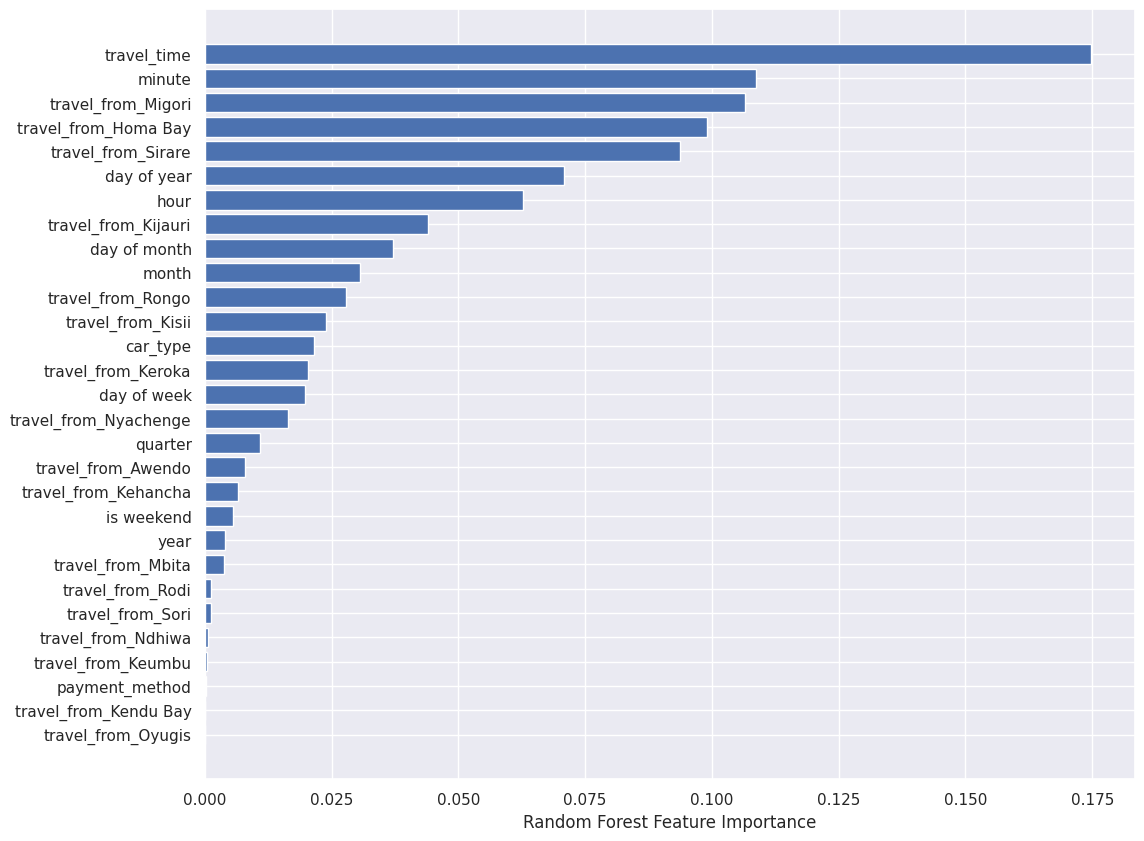

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = grid.best_estimator_.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Random Forest Feature Importance')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes, as ensamples technique it giving some imporment where `Training Accuracy: 0.660359610245961`
`Testing Accuracy: 0.5984895827012413`

### ML Model - XGboost

In [ ]:
#import the model
import xgboost as xgb

In [ ]:
xgb_reg = xgb.XGBRegressor( booster= 'gbtree',
                        eta= 0.004,
                        learning_rate= 0.1,
                        max_depth= 7,
                        min_child_weight= 10,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        scale_pos_weight= 1,
                        verbosity= 1)

In [ ]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.004, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=1, num_parallel_tree=None, ...)

In [ ]:
#model prediction
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_xgb = xgb_reg.score(X_train,y_train)
print('Training Accuracy:',train_model_xgb)

test_model_xgb = xgb_reg.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgb)

Training Accuracy: 0.7785362944272289
Testing Accuracy: 0.6682880330396206


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_pred_xgb)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred_xgb)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred_xgb)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_xgb))
print('RMSE is:',RMSE)

MSE is: 25.044976490169073
MAE is: 3.348775893378258
r2: 0.6682880330396206
adjust_r2 is: 0.663074132203929
RMSE is: 5.004495627949841


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb = xgb.XGBRegressor()

In [ ]:
params = {"min_child_weight":[9,10,11],
          'eta': [0.05,0.06,0.07],
          'eval_metric':['rmse'],
          'colsample_bytree':[0.6],
          'max_depth': [8,9,10],
          }

In [ ]:
xgb_grid = GridSearchCV(xgb,param_grid=params, verbose=1,cv=5)
xgb_grid.fit(x, Y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.6], 'eta': [0.05, 0.06, 0.07],
                         'eval_metric': ['rmse'], 'max_depth': [8, 9, 10],
                         'min_child_weight': [9, 10, 11]},
             verbose=1)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eta': 0.05,
 'eval_metric': 'rmse',
 'max_depth': 10,
 'min_child_weight': 11}

In [ ]:
xgb_grid.best_estimator_.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.6,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'rmse',
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 11,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'eta': 0.05}

In [ ]:
y_pred_xgbh = xgb_grid.predict(X_test)

In [ ]:
# Model score on Train and Test
train_model_xgh = xgb_grid.score(X_train,y_train)
print('Training Accuracy:',train_model_xgh)

test_model_xgh = xgb_grid.score(X_test,y_test)
print('Testing Accuracy:',test_model_xgh)

Training Accuracy: 0.7813039859131607
Testing Accuracy: 0.7914265666563978


In [ ]:
# Visualizing evaluation Metric Score chart
MSE=mean_squared_error(y_test,y_pred_xgbh)
print('MSE is:',MSE)
MAE=mean_absolute_error(y_test,y_pred_xgbh)
print('MAE is:',MAE)
r2=r2_score(y_test,y_pred_xgbh)
print('r2:',r2)
adjusted_r2=(1-(1-r2_score(y_test, y_pred_xgbh))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print('adjust_r2 is:',adjusted_r2)
RMSE=math.sqrt(mean_squared_error(y_test, y_pred_xgbh))
print('RMSE is:',RMSE)

MSE is: 15.747748814827359
MAE is: 2.720317748824755
r2: 0.7914265666563978
adjust_r2 is: 0.7881481766472029
RMSE is: 3.96834333378897


### XGBregressor Important Features

In [ ]:
# arry of important features
importance = xgb_grid.best_estimator_.feature_importances_
importance

array([0.00148582, 0.03021728, 0.0097442 , 0.00297426, 0.00802899,
       0.00397671, 0.01684864, 0.01535851, 0.00381751, 0.0051983 ,
       0.004492  , 0.00613554, 0.0205838 , 0.16470547, 0.01723578,
       0.        , 0.03065996, 0.00385344, 0.07242384, 0.01835494,
       0.01351192, 0.23753525, 0.00385113, 0.03501616, 0.        ,
       0.0091266 , 0.02570816, 0.23251441, 0.00664146], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

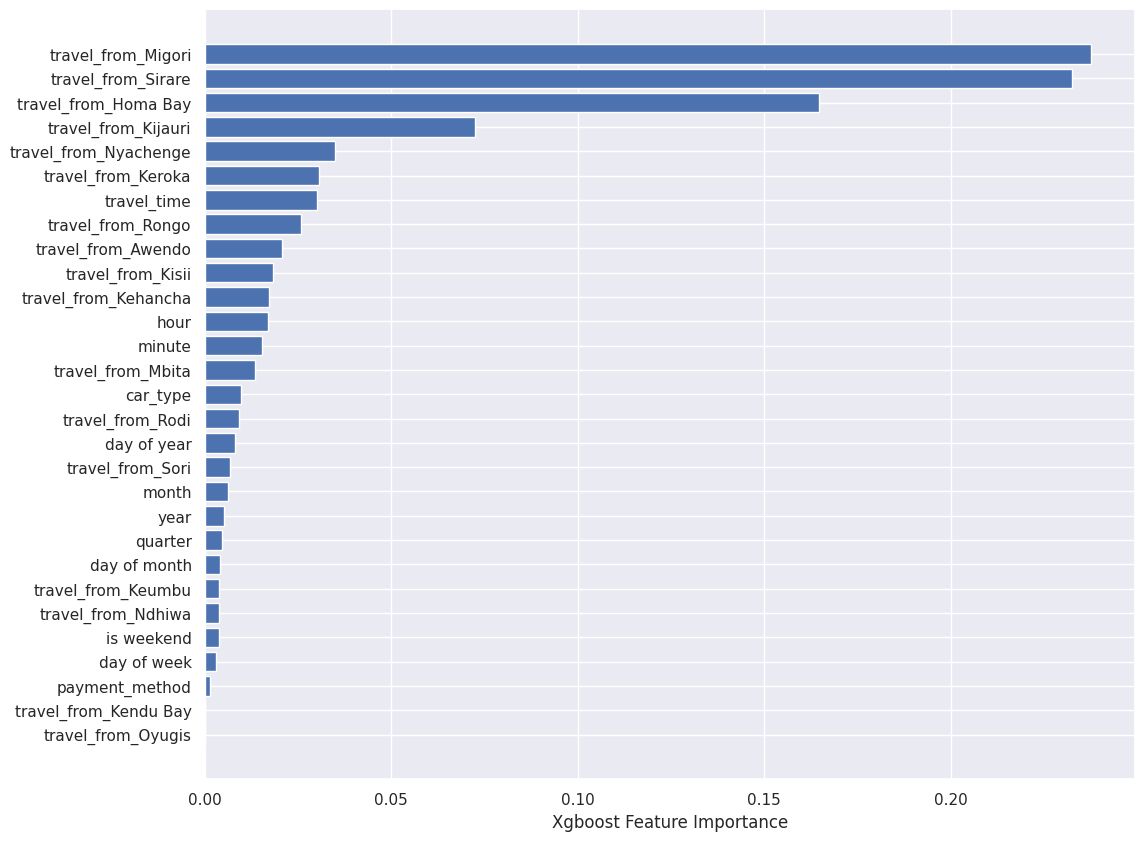

In [ ]:
# plotting important features using Xgboost in built function.
plt.figure(figsize=(12,10))
sorted_idx = xgb_grid.best_estimator_.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],importance[sorted_idx])
plt.xlabel('Xgboost Feature Importance')

# **Evaluating all models**

In [ ]:
#evaluation metrics for all classifiers
Model = ["Linear Regression","Lasso Regression","Ridge Regression","Elastic Net Regression","Decision Tree",'Random Forest','Xgboost']
Train_Accuracy= [train_acc,train_model_lrh,train_model_rrh,train_model_enh,train_model_tr,train_model_rfh, train_model_xgh]
Test_Accuracy = [test_acc,test_model_lrh,test_model_rrh,test_model_enh,test_model_tr, test_model_rfh, test_model_xgh]

In [ ]:
#creating dataframe for all classifiers using dictionary
pd.DataFrame({"Model":Model,"Train Accuracy":Train_Accuracy,'Test Accuracy': Test_Accuracy,
  'r2_score':[0.41873,0.41793,0.41656,0.41779,0.56849, 0.69950,0.75580],
   'Adjusted r2_score':[0.40686,0.40604,0.40465,0.40590,0.56171,0.69477,0.751965],
    'MSE':[50.7155, 50.78563,50.90495,50.79781,32.57962,22.68822,18.43735],
    'RMSE':[7.12148,7.12640,7.1347,7.12725,5.70785,4.76321,4.29387],
    'MAE':[4.8109, 4.82053,4.830123,4.82111,3.92137,3.25018,2.9953]
             })

,Model,Train Accuracy,Test Accuracy,r2_score,Adjusted r2_score,MSE,RMSE,MAE
0,Linear Regression,0.369492,0.419032,0.41873,0.406860,50.71550,7.12148,4.810900
1,Lasso Regression,0.369493,0.417937,0.41793,0.406040,50.78563,7.12640,4.820530
2,Ridge Regression,0.369366,0.416569,0.41656,0.404650,50.90495,7.13470,4.830123
3,Elastic Net Regression,0.369497,0.417797,0.41779,0.405900,50.79781,7.12725,4.821110
4,Decision Tree,0.613877,0.568494,0.56849,0.561710,32.57962,5.70785,3.921370
5,Random Forest,0.688714,0.700116,0.69950,0.694770,22.68822,4.76321,3.250180
6,Xgboost,0.781304,0.791427,0.75580,0.751965,18.43735,4.29387,2.995300



Observation:

We can see from above table that

1) Xgboost have highest Training and Testing Accuracy.

2) Xgboost also have best r2 score.

3) It also have minimum MSE, RMSE, MAE errors.

Hence we can say that Xgboost is the best Model.


# **Conclusion**

1.    **As we have implemented six different models to predict the number of seats that Mobiticket can expect to sell for each ride. Linear Regression, Regularized linear regression (Ridge and Lasso), Decision Tree, Random Forest Regressor and Xgboost Regressor.
Xgboost regression model with hyperparameter tuning performed the best among them.**
2.    **Our Model will help Mobiticket and Bus operators to anticipate the number of tickets they can expect to sell for each ride.**

***Thank you:)***